___
# Ciência dos Dados - PROJETO 1

## Kaique Dognani


## Análise sobre o acesso à internet nas áreas rurais para cada região brasileira

___
## Introdução

Neste projeto pretendo estudar o acesso a internet em casas na área rural de todas as regiões do Brasil. Usando como parâmetros o número de pessoas que vivem na casa e o número de banheiros na mesma.

___
## Análise e Resultados

In [121]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [122]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\celia\Desktop


In [123]:
#Dados utilizados para analise:
dados2013 = pd.read_table("DOM2013.csv", encoding="windows-1252", sep=",")
dados2014 = pd.read_table("DOM2014.csv", encoding="windows-1252", sep=",")
dados2015 = pd.read_table("DOM2015.csv", encoding="windows-1252", sep=",")

## Ano de 2013

In [124]:
# Primeira filtragem para haver apenas áreas rurais
Dados_Filtrados_2013 = dados2013[(dados2013['V4105']>=4)]
# Dataframe filtrado:
Dados_Filtrados_2013 = Dados_Filtrados_2013[['UF','V0220','V0231','V0232','V4105','V02322','V0105','V2016']]

Dados_Filtrados_2013.loc[(Dados_Filtrados_2013.UF<=59) ,'Região'] = 'Centro-Oeste'
Dados_Filtrados_2013.loc[(Dados_Filtrados_2013.UF<=49) ,'Região'] = 'Sul'
Dados_Filtrados_2013.loc[(Dados_Filtrados_2013.UF<=39) ,'Região'] = 'Sudeste'
Dados_Filtrados_2013.loc[(Dados_Filtrados_2013.UF<=29) ,'Região'] = 'Nordeste'
Dados_Filtrados_2013.loc[(Dados_Filtrados_2013.UF<=19) ,'Região'] = 'Norte'

Dados_Filtrados_2013.loc[(Dados_Filtrados_2013.V4105>4) ,'Lote'] = 'Rural'

Dados_Filtrados_2013.V0220 = Dados_Filtrados_2013.V0220.astype('category')
Dados_Filtrados_2013.V0231 = Dados_Filtrados_2013.V0231.astype('category')
Dados_Filtrados_2013.V0232 = Dados_Filtrados_2013.V0232.astype('category')
Dados_Filtrados_2013.V4105 = Dados_Filtrados_2013.V4105.astype('category')
Dados_Filtrados_2013.V02322 = Dados_Filtrados_2013.V02322.astype('category')
Dados_Filtrados_2013.V0105 = pd.cut(Dados_Filtrados_2013.V0105, bins=5)


Dados_Filtrados_2013.V0220.cat.categories = (['Sim', 'Não'])
Dados_Filtrados_2013.V0231.cat.categories = (['Sim', 'Não'])
Dados_Filtrados_2013.V0232.cat.categories = (['Sim', 'Não'])
Dados_Filtrados_2013.V02322.cat.categories = (['Sim', 'Não'])


Dados_2013_Microcomputador = Dados_Filtrados_2013.V0231.value_counts()


Dados_Filtrados_2013 = Dados_Filtrados_2013.dropna()

Dados_Filtrados_2013 = Dados_Filtrados_2013.rename(columns={'V0220':'Celular', 'V0231':'Microcomputador','V0232':'Micro com internet','V4105':'Tipo de Região','V0105':'Nº de Moradores','V02322':'Internet em Casa', 'V2016':'Nº de Banheiros'})

#Algumas colunas removidas para não causar confusão
Dados_Filtrados_2013.drop(['UF'], axis = 1, inplace = True)
Dados_Filtrados_2013.drop(['Tipo de Região'], axis = 1, inplace = True)
Dados_Filtrados_2013.drop(['Microcomputador'], axis = 1, inplace = True)

#Dados_Filtrados_2013

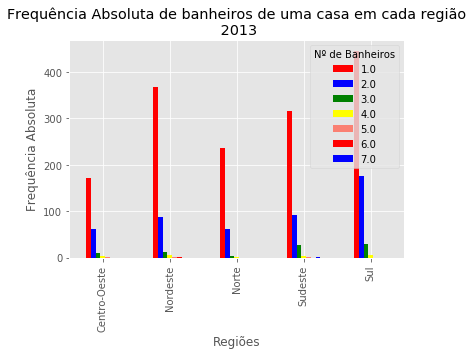

In [125]:
#Gráficos
MorXReg = pd.crosstab(Dados_Filtrados_2013['Região'], Dados_Filtrados_2013['Nº de Banheiros'])
MorXReg.plot(kind='bar', color=('red','blue','green','yellow', 'salmon'))
plt.title('Frequência Absoluta de banheiros de uma casa em cada região\n 2013')
plt.ylabel('Frequência Absoluta')
plt.xlabel('Regiões')
MorXReg
plt.show()

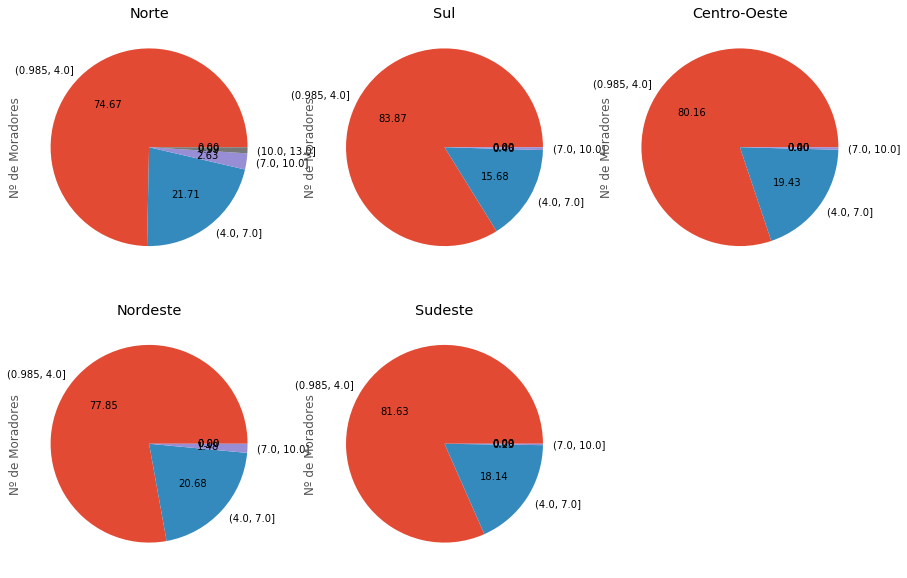

In [126]:
fig = plt.figure(figsize=(15,10))
plt.subplot(231)
reg = (Dados_Filtrados_2013['Nº de Moradores'][Dados_Filtrados_2013['Região'] == 'Norte']).value_counts()
reg.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Norte')

plt.subplot(232)
reg = (Dados_Filtrados_2013['Nº de Moradores'][Dados_Filtrados_2013['Região'] == 'Sul']).value_counts()
reg.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Sul')

plt.subplot(233)
reg = (Dados_Filtrados_2013['Nº de Moradores'][Dados_Filtrados_2013['Região'] == 'Centro-Oeste']).value_counts()
reg.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Centro-Oeste')

plt.subplot(234)
reg = (Dados_Filtrados_2013['Nº de Moradores'][Dados_Filtrados_2013['Região'] == 'Nordeste']).value_counts()
reg.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Nordeste')

plt.subplot(235)
reg = (Dados_Filtrados_2013['Nº de Moradores'][Dados_Filtrados_2013['Região'] == 'Sudeste']).value_counts()
reg.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Sudeste')
plt.show()

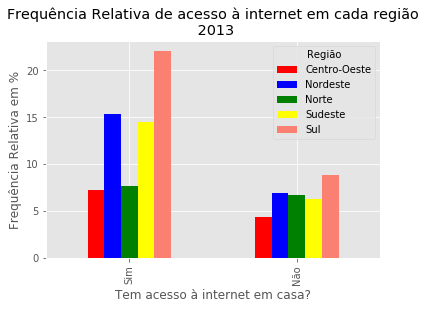

In [127]:
IntXReg_2013 = pd.crosstab(Dados_Filtrados_2013['Internet em Casa'], Dados_Filtrados_2013['Região'], normalize=True)*100
IntXReg_2013.plot(kind='bar', color=('red','blue','green','yellow', 'salmon'))
plt.title('Frequência Relativa de acesso à internet em cada região\n 2013')
plt.ylabel('Frequência Relativa em %')
plt.xlabel('Tem acesso à internet em casa?')
IntXReg_2013
plt.show()

## Ano de 2014

In [128]:
# Primeira filtragem para haver apenas áreas rurais
Dados_Filtrados_2014 = dados2014[(dados2014['V4105']>=4)]
# Dataframe filtrado:
Dados_Filtrados_2014 = Dados_Filtrados_2014[['UF','V0220','V0231','V0232','V4105','V02322','V0105','V2016']]

Dados_Filtrados_2014.loc[(Dados_Filtrados_2014.UF<=59) ,'Região'] = 'Centro-Oeste'
Dados_Filtrados_2014.loc[(Dados_Filtrados_2014.UF<=49) ,'Região'] = 'Sul'
Dados_Filtrados_2014.loc[(Dados_Filtrados_2014.UF<=39) ,'Região'] = 'Sudeste'
Dados_Filtrados_2014.loc[(Dados_Filtrados_2014.UF<=29) ,'Região'] = 'Nordeste'
Dados_Filtrados_2014.loc[(Dados_Filtrados_2014.UF<=19) ,'Região'] = 'Norte'

Dados_Filtrados_2014.loc[(Dados_Filtrados_2014.V4105>4) ,'Lote'] = 'Rural'

Dados_Filtrados_2014.V0220 = Dados_Filtrados_2014.V0220.astype('category')
Dados_Filtrados_2014.V0231 = Dados_Filtrados_2014.V0231.astype('category')
Dados_Filtrados_2014.V0232 = Dados_Filtrados_2014.V0232.astype('category')
Dados_Filtrados_2014.V4105 = Dados_Filtrados_2014.V4105.astype('category')
Dados_Filtrados_2014.V02322 = Dados_Filtrados_2014.V02322.astype('category')
Dados_Filtrados_2014.V0105 = pd.cut(Dados_Filtrados_2014.V0105, bins=4)


Dados_Filtrados_2014.V0220.cat.categories = (['Sim', 'Não'])
Dados_Filtrados_2014.V0231.cat.categories = (['Sim', 'Não'])
Dados_Filtrados_2014.V0232.cat.categories = (['Sim', 'Não'])
Dados_Filtrados_2014.V02322.cat.categories = (['Sim', 'Não'])


Dados_2014_Microcomputador = Dados_Filtrados_2014.V0231.value_counts()


Dados_Filtrados_2014 = Dados_Filtrados_2014.dropna()

Dados_Filtrados_2014 = Dados_Filtrados_2014.rename(columns={'V0220':'Celular', 'V0231':'Microcomputador','V0232':'Micro com internet','V4105':'Tipo de Região','V0105':'Nº de Moradores','V02322':'Internet em Casa', 'V2016':'Nº de Banheiros'})

#Algumas colunas removidas para não causar confusão
Dados_Filtrados_2014.drop(['UF'], axis = 1, inplace = True)
Dados_Filtrados_2014.drop(['Tipo de Região'], axis = 1, inplace = True)
Dados_Filtrados_2014.drop(['Microcomputador'], axis = 1, inplace = True)

#Dados_Filtrados_2014

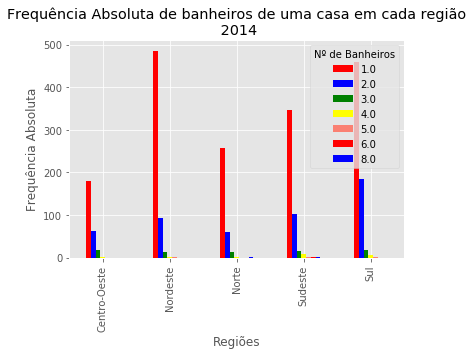

In [129]:
#Gráficos
MorXReg = pd.crosstab(Dados_Filtrados_2014['Região'], Dados_Filtrados_2014['Nº de Banheiros'])
MorXReg.plot(kind='bar', color=('red','blue','green','yellow', 'salmon'))
plt.title('Frequência Absoluta de banheiros de uma casa em cada região\n 2014')
plt.ylabel('Frequência Absoluta')
plt.xlabel('Regiões')
MorXReg
plt.show()

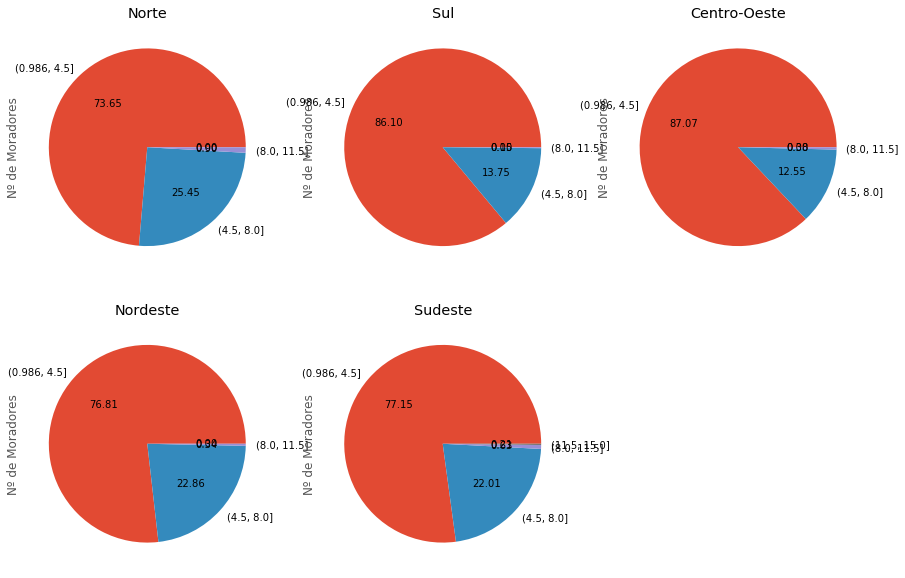

In [130]:
fig = plt.figure(figsize=(15,10))
plt.subplot(231)
reg = (Dados_Filtrados_2014['Nº de Moradores'][Dados_Filtrados_2014['Região'] == 'Norte']).value_counts()
reg.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Norte')

plt.subplot(232)
reg = (Dados_Filtrados_2014['Nº de Moradores'][Dados_Filtrados_2014['Região'] == 'Sul']).value_counts()
reg.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Sul')

plt.subplot(233)
reg = (Dados_Filtrados_2014['Nº de Moradores'][Dados_Filtrados_2014['Região'] == 'Centro-Oeste']).value_counts()
reg.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Centro-Oeste')

plt.subplot(234)
reg = (Dados_Filtrados_2014['Nº de Moradores'][Dados_Filtrados_2014['Região'] == 'Nordeste']).value_counts()
reg.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Nordeste')

plt.subplot(235)
reg = (Dados_Filtrados_2014['Nº de Moradores'][Dados_Filtrados_2014['Região'] == 'Sudeste']).value_counts()
reg.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Sudeste')

plt.show()


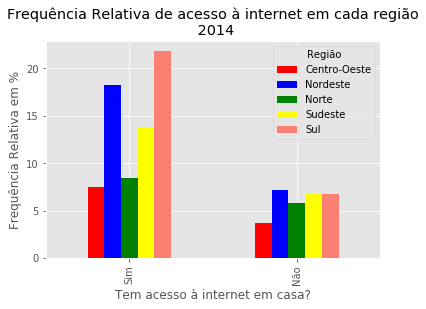

In [131]:
IntXReg_2014 = pd.crosstab(Dados_Filtrados_2014['Internet em Casa'], Dados_Filtrados_2014['Região'], normalize=True)*100
IntXReg_2014.plot(kind='bar', color=('red','blue','green','yellow', 'salmon'))
plt.title('Frequência Relativa de acesso à internet em cada região\n 2014')
plt.ylabel('Frequência Relativa em %')
plt.xlabel('Tem acesso à internet em casa?')
IntXReg_2014
plt.show()

## Ano de 2015

In [132]:
# Primeira filtragem para haver apenas áreas rurais
Dados_Filtrados_2015 = dados2015[(dados2015['V4105']>=4)]
# Dataframe filtrado:
Dados_Filtrados_2015 = Dados_Filtrados_2015[['UF','V0220','V0231','V0232','V4105','V02322','V0105','V2016']]

Dados_Filtrados_2015.loc[(Dados_Filtrados_2015.UF<=59) ,'Região'] = 'Centro-Oeste'
Dados_Filtrados_2015.loc[(Dados_Filtrados_2015.UF<=49) ,'Região'] = 'Sul'
Dados_Filtrados_2015.loc[(Dados_Filtrados_2015.UF<=39) ,'Região'] = 'Sudeste'
Dados_Filtrados_2015.loc[(Dados_Filtrados_2015.UF<=29) ,'Região'] = 'Nordeste'
Dados_Filtrados_2015.loc[(Dados_Filtrados_2015.UF<=19) ,'Região'] = 'Norte'

Dados_Filtrados_2015.loc[(Dados_Filtrados_2015.V4105>4) ,'Lote'] = 'Rural'

Dados_Filtrados_2015.V0220 = Dados_Filtrados_2015.V0220.astype('category')
Dados_Filtrados_2015.V0231 = Dados_Filtrados_2015.V0231.astype('category')
Dados_Filtrados_2015.V0232 = Dados_Filtrados_2015.V0232.astype('category')
Dados_Filtrados_2015.V4105 = Dados_Filtrados_2015.V4105.astype('category')
Dados_Filtrados_2015.V02322 = Dados_Filtrados_2015.V02322.astype('category')
Dados_Filtrados_2015.V0105 = pd.cut(Dados_Filtrados_2015.V0105, bins=5)


Dados_Filtrados_2015.V0220.cat.categories = (['Sim', 'Não'])
Dados_Filtrados_2015.V0231.cat.categories = (['Sim', 'Não'])
Dados_Filtrados_2015.V0232.cat.categories = (['Sim', 'Não'])
Dados_Filtrados_2015.V02322.cat.categories = (['Sim', 'Não'])


Dados_2015_Microcomputador = Dados_Filtrados_2015.V0231.value_counts()


Dados_Filtrados_2015 = Dados_Filtrados_2015.dropna()

Dados_Filtrados_2015 = Dados_Filtrados_2015.rename(columns={'V0220':'Celular', 'V0231':'Microcomputador','V0232':'Micro com internet','V4105':'Tipo de Região','V0105':'Nº de Moradores','V02322':'Internet em Casa', 'V2016':'Nº de Banheiros'})

#Algumas colunas removidas para não causar confusão
Dados_Filtrados_2015.drop(['UF'], axis = 1, inplace = True)
Dados_Filtrados_2015.drop(['Tipo de Região'], axis = 1, inplace = True)
Dados_Filtrados_2015.drop(['Microcomputador'], axis = 1, inplace = True)

#Dados_Filtrados_2015

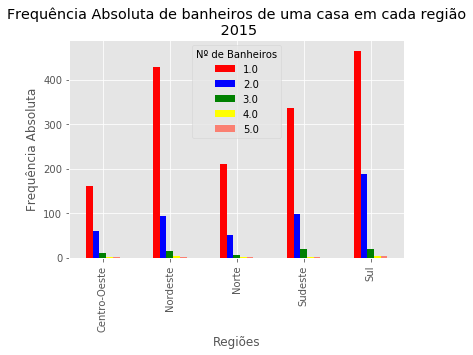

In [133]:
#Gráficos
MorXReg = pd.crosstab(Dados_Filtrados_2015['Região'], Dados_Filtrados_2015['Nº de Banheiros'])
MorXReg.plot(kind='bar', color=('red','blue','green','yellow', 'salmon'))
plt.title('Frequência Absoluta de banheiros de uma casa em cada região\n 2015')
plt.ylabel('Frequência Absoluta')
plt.xlabel('Regiões')
MorXReg
plt.show()

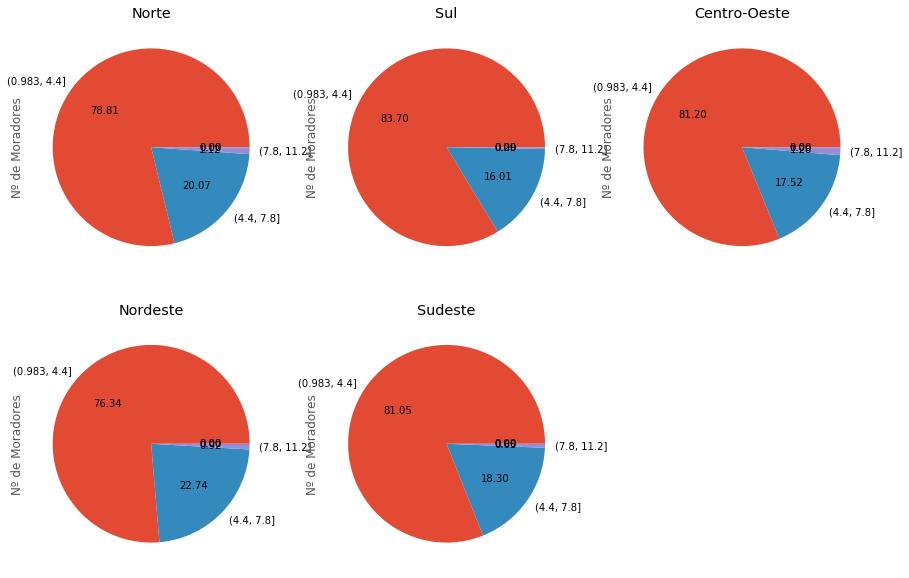

In [134]:
fig = plt.figure(figsize=(15,10))
plt.subplot(231)
reg = (Dados_Filtrados_2015['Nº de Moradores'][Dados_Filtrados_2015['Região'] == 'Norte']).value_counts()
reg.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Norte')

plt.subplot(232)
reg = (Dados_Filtrados_2015['Nº de Moradores'][Dados_Filtrados_2015['Região'] == 'Sul']).value_counts()
reg.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Sul')

plt.subplot(233)
reg = (Dados_Filtrados_2015['Nº de Moradores'][Dados_Filtrados_2015['Região'] == 'Centro-Oeste']).value_counts()
reg.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Centro-Oeste')

plt.subplot(234)
reg = (Dados_Filtrados_2015['Nº de Moradores'][Dados_Filtrados_2015['Região'] == 'Nordeste']).value_counts()
reg.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Nordeste')

plt.subplot(235)
reg = (Dados_Filtrados_2015['Nº de Moradores'][Dados_Filtrados_2015['Região'] == 'Sudeste']).value_counts()
reg.plot(kind='pie', autopct="%.2f",legend=False)
plt.title('Sudeste')

plt.show()


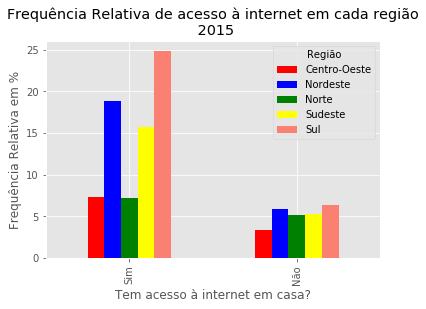

In [135]:
IntXReg_2015 = pd.crosstab(Dados_Filtrados_2015['Internet em Casa'], Dados_Filtrados_2015['Região'], normalize=True)*100
IntXReg_2015.plot(kind='bar', color=('red','blue','green','yellow', 'salmon'))
plt.title('Frequência Relativa de acesso à internet em cada região\n 2015')
plt.ylabel('Frequência Relativa em %')
plt.xlabel('Tem acesso à internet em casa?')
IntXReg_2015
plt.show()

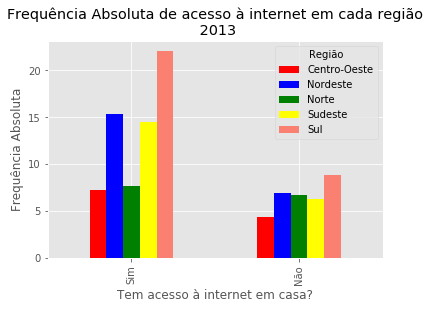

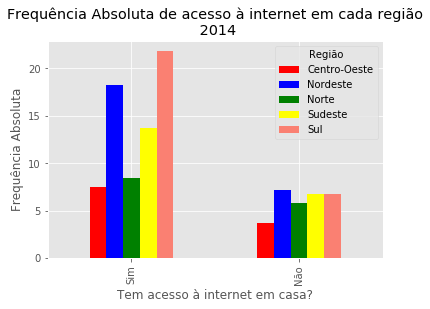

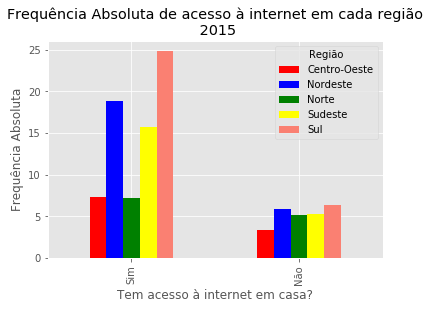

In [139]:
IntXReg_2013.plot(kind='bar', color=('red','blue','green','yellow', 'salmon'))
plt.title('Frequência Absoluta de acesso à internet em cada região\n 2013')
plt.ylabel('Frequência Absoluta')
plt.xlabel('Tem acesso à internet em casa?')


IntXReg_2014.plot(kind='bar', color=('red','blue','green','yellow', 'salmon'))
plt.title('Frequência Absoluta de acesso à internet em cada região\n 2014')
plt.ylabel('Frequência Absoluta')
plt.xlabel('Tem acesso à internet em casa?')


IntXReg_2015.plot(kind='bar', color=('red','blue','green','yellow', 'salmon'))
plt.title('Frequência Absoluta de acesso à internet em cada região\n 2015')
plt.ylabel('Frequência Absoluta')
plt.xlabel('Tem acesso à internet em casa?')

___
## Conclusão 

Os gráficos de 'Frequência Absoluta de banheiros de uma casa em cada região' trazem para a análise um fator de renda, pois quanto maior o número de banheiros em uma casa maior a renda da mesma (http://economia.estadao.com.br/noticias/geral,classes-c-d-e-e-reunem-68-dos-brasileiros-imp-,1604195). Já os gráficos de número de moradores em uma casa por região trazem para a análise uma visão da frequência relativa do número pessoas que vivem em uma casa para cada região. Esses gáficos em conjunto apresentam uma evolução do número de pessoas que vivem em uma casa, o que não pode se dizer do número de banheiros, que teve alterações mínimas de um ano para o outro.

Os gráficos de acesso à internet demonstram que o número de pessoas que têm acesso à internet em todas as regiões do Brasil aumentou, Porém esse aumento não foi igual para todos, sendo a região sul e a região nordeste as regiões que mais cresceram.